# **Penny drop without Air Resistance**

In [ ]:
# set up libraries

# modsim.py setup
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' + 'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [ ]:
# import all required functions
from modsim import *
from numpy import pi

In [ ]:
# first calculate gravity on Arrakis
earth_grav = 9.81
arrak_grav = earth_grav*0.38
print('Gravity on Arrakis is = %.2f' % arrak_grav,'m/s\u00b2') 

Gravity on Arrakis is = 6.08 m/s²


Penny hits the ground at 4.37 seconds
The final velocity is 26.56 m/s


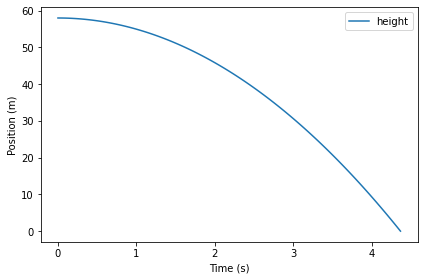

In [ ]:
# set initial drop height and velocity
init = State(y=58, v=0)
system = System(init=init, g=arrak_grav, t_end=10)

# define slope function to calculate derivatives
def slope_func(t, state, system):
    y, v = state
    dydt = v
    dvdt = -system.g    # set g as -ve to account for deceleration
    return dydt, dvdt

# define an event function to stop simulation when 
# height = 0, ie penny has hit the ground 
def event_func(t, state, system):
    y, v = state
    return y

results, details = run_solve_ivp(system, slope_func, events=event_func)
y, v = results.iloc[-1]
# print results
results.y.plot(label='height')
decorate(xlabel='Time (s)', ylabel='Position (m)')
print('Penny hits the ground at %.2f' % results.index[-1],'seconds')
print('The final velocity is %.2f' % abs(v),'m/s')